**Course:** MATH 616 - Data-Driven Dynamical Systems, Stochastic Modeling and Prediction

**Name:** Shrivats Sudhir

**NetID:** ssudhir2

**Email:** ssudhir2@wisc.edu

**Date:** September 9th, 2024

**Table of Contents:**

* [Question 1.](#question-1)
    * [Question 1 (a.)](#question-1-a)
    * [Question 1 (b.)](#question-1-b)
        * [Question 1b (i.)](#question-1b-i)
        * [Question 1b (ii.)](#question-1-b-ii)

* [Question 2.](#question-2)
    * [Question 2 (a.)](#question-2-a)
        * [Question 2a (i.)](#question-2a-i)
        * [Question 2a (ii.)](#question-2a-ii)
    * [Question 2 (b.)](#question-2-b)
        * [Question 2b (i.)](#question-2b-i)
        * [Question 2b (ii.)](#question-2b-ii)

* [Question 3.](#question-3)

* [Question 4.](#question-4)

In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm

# Question 1.

**Consider the linear damped-forced model:**
$$ \frac{du}{dt} = -au + f $$
**where $a > 0$ and $f$ are both constants.**

## Question 1 (a.)

**Derive the analytic solution of $u$ with initial condition being $u(t=0) = u_0$.**

\begin{equation*}
    \begin{split}
        \frac{du}{dt}     &= -au + f\\
        dt                &= \frac{1}{-au + f} \; du\\
        \int dt           &= \int \frac{1}{-au + f} \; du\\
        t + C_1           &= -\frac{1}{a} \cdot \text{log}(-au + f) + C_2\\
        u(t)              &= \underbrace{-\frac{1}{a \cdot \text{exp}(a(C_1-C_2))}}_{=C} \cdot \text{exp}(-at) + \frac{f}{a}\\
    \end{split}
\end{equation*}

The analytical solution of $u$ is:
$$ u(t) = C \cdot \text{exp}(-at) + \frac{f}{a} $$

Furthermore, we can see that at $t=0$:
\begin{equation*}
    \begin{split}
    u_0 &= C + \frac{f}{a}\\
    C   &= u_0 - \frac{f}{a} 
    \end{split}
\end{equation*}

Therefore, we have that:
\begin{equation*}
    \begin{split}
    u(t) &= \bigg(u_0 - \frac{f}{a}\bigg) \cdot \text{exp}(-at) + \frac{f}{a}\\
         &= u_0 \cdot \text{exp}(-at) + \frac{f}{a}\big(1 - \text{exp}(-at)\big)
    \end{split}
\end{equation*}

which is the analytical solution of $u$, where $a>0$ and $f$ are both constants.

In [514]:
def du_dt(a, f, u):
    
    """
    ODE function u' = (-au + f).
    
    --- inputs ---
    - a: constant
    - f: constant
    - u: variable
    """
    
    return (-a*u) + f

def u(u0, a, f, t):
    
    """
    Analytical solution u of u'.
    
    --- inputs ---
    - u0: initial condition
    - a: constant
    - f: constant
    - t: variable
    """
    
    return u0 * np.exp(-a*t) + f/a * (1 - np.exp(-a*t))

def forward_euler(u0, t0, tend, h, a, f):
    
    """
    Implementing forward euler to estimate numerical solution of u'.

    --- inputs ---
    - u0: initial condition
    - t0: initial time
    - tend: final time
    - h: time-step
    - a: constant (for function du_dt)
    - f: constant (for function du_dt)
    """
    
    num_steps = int((tend-t0)/h)
    t = np.linspace(t0, tend, num_steps+1)
    y = np.zeros(num_steps+1)
    y[0] = u0
    
    for i in range(num_steps):
        y[i+1] = y[i] + h * du_dt(a=a, f=f, u=y[i])
    
    return t, y

## Question 1 (b.)

**Use the forward Euler method to numerically solve the equation. Here, use the initial condition $u_0=5$. The parameters are $a=0.5$ and $f=2$. Run the model starting from $t=0$ and ending at $t=2$.**

We know that the first-order ODE:
$$ u' = \frac{du}{dt} = -au + t $$

Which for a small enough $h$ can be approximated as:
\begin{equation*}
    \begin{split}
        u' &\approx \frac{u(t+h) - u(t)}{h}\\
        u(t+h) &\approx u' \cdot h + u(t)\\
    \end{split}
\end{equation*}

We can code the above (with $h=0.1$) and print an output table which shows the following columns:
* `t`: time (defined by time_step parameter $h$)
* `true_soln`: analytical solution when plugging in $t$ in $u(t)$
* `approx_soln`: forward euler approximation for $u(t)$ at time $t$
* `abs_diff`: absolute difference between true_soln and approx_soln

In [515]:
u0 = 5
a = 0.5
f = 2
t0 = 0
tend = 2
h = 0.1

t, approx_y = forward_euler(u0=5, t0=0, tend=2, h=h, a=a, f=f)

true_y = np.zeros(len(t))
for i in range(len(t)):
    true_y[i] = u(u0=u0, a=a, f=f, t=t[i])
    
df = pd.DataFrame({'t': np.linspace(0, 2, len(true_y)), 
                   'true_soln': true_y, 
                   'approx_soln': approx_y, 
                   'abs_diff': np.abs(true_y - approx_y)})
df.style.background_gradient(cmap='viridis', subset=['true_soln', 'approx_soln', 'abs_diff'])

,t,true_soln,approx_soln,abs_diff
0,0.000000,5.000000,5.000000,0.000000
1,0.100000,4.951229,4.950000,0.001229
2,0.200000,4.904837,4.902500,0.002337
3,0.300000,4.860708,4.857375,0.003333
4,0.400000,4.818731,4.814506,0.004225
5,0.500000,4.778801,4.773781,0.005020
6,0.600000,4.740818,4.735092,0.005726
7,0.700000,4.704688,4.698337,0.006351
8,0.800000,4.670320,4.663420,0.006900
9,0.900000,4.637628,4.630249,0.007379


### Question 1b (i.)

**Plot the numerical solution (using one choice of time step) and the analytic solution.**

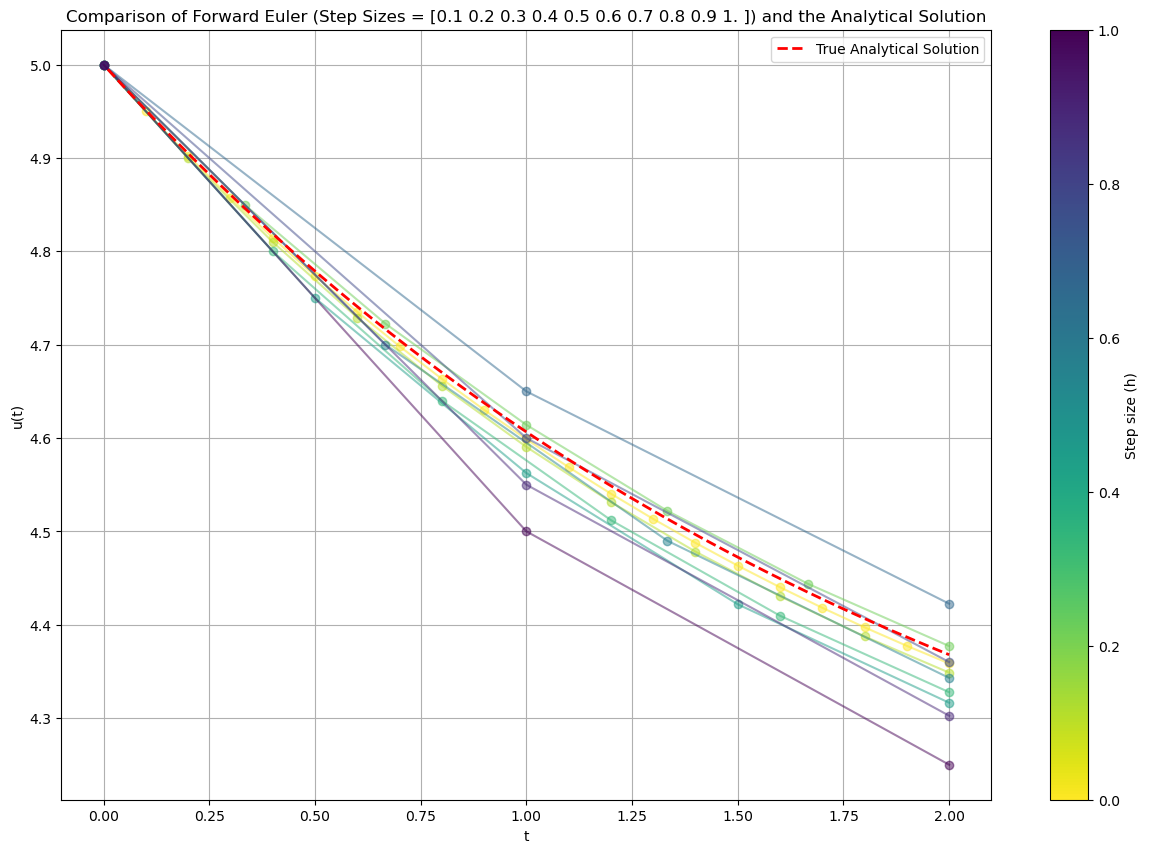

In [516]:
fig, ax = plt.subplots(figsize=(15, 10))  # Create a figure and axes

# Define the range of step sizes (h)
h_values = np.linspace(0.1, 1, 10, endpoint=True)

# Set up the color map using Viridis
cmap = cm.get_cmap('viridis_r')
colors = [cmap(i) for i in np.linspace(0, 1, len(h_values))]

# Plot the Euler solutions for different step sizes with color gradient
for i in range(len(h_values)):
    h = round(h_values[i], 2)
    t, y = forward_euler(u0=u0, t0=0, tend=2, h=h, a=a, f=f)
    ax.plot(t, y, 
            color=colors[i], 
            alpha=0.5, 
            marker='o', 
            #label=f'Euler Approximation h={h}'
            )

# Plot the true analytical solution
true_y = []
true_t = np.linspace(0.01, 2, 1000)
for i in true_t:
    true_y.append(u(u0=u0, a=a, f=f, t=i))

# Plot the true solution with a thick black dashed line
ax.plot(true_t, true_y, linewidth=2, color='red', linestyle='--', label='True Analytical Solution')

# Labels and title
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.set_title(f'Comparison of Forward Euler (Step Sizes = {h_values}) and the Analytical Solution')

# Display the legend
ax.legend()

# Add a colorbar to show the mapping from step size to color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])

# Add the colorbar explicitly associated with the current axes
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Step size (h)')

plt.grid(True)
plt.show()


### Question 1 b (ii.)

**Compute the error in the numerical solution (compared with the analytic solution) at $t=2$ using different numerical integration time steps $\Delta t = 10^{-5}, 5 \times 10^{-5}, 10^{-4}, 5 \times 10^{-4}, 10^{-3}$ and $5 \times 10^{-3}$. Plot a curve, where the x-axis is the time step and the y-axis is the absolute error. Use log scale for both x and y axes and write down the slope.**

The absolute errors are:
h=1e-05, error=9.197012884598621e-07
h=5e-05, error=4.598540916056493e-06
h=0.0001, error=9.197177620379193e-06
h=0.0005, error=4.598972081915065e-05
h=0.001, error=9.198902547336019e-05
h=0.005, error=0.000460328910758534




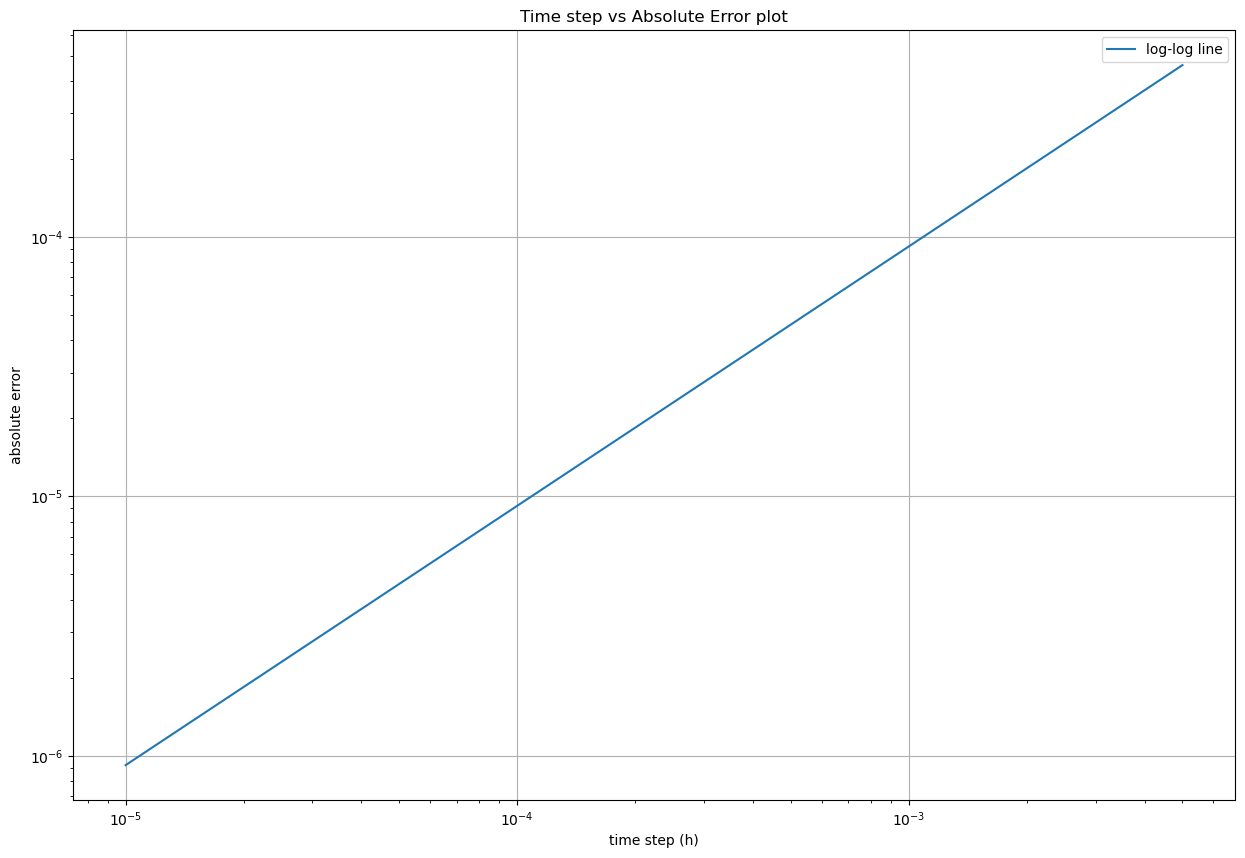

In [517]:
plt.figure(figsize=(15, 10))

time_steps = [1e-5, 5*1e-5, 1e-4, 5*1e-4, 1e-3, 5*1e-3]

abs_error = []
for i, h in enumerate(time_steps):
    t, y = forward_euler(u0=u0, t0=0, tend=2, h=time_steps[i], a=a, f=f) 
    abs_error.append( np.abs(u(u0=u0, a=a, f=f, t=2.0) - y[-1]) )
print('The absolute errors are:')
for i in range(len(abs_error)):
    print(f"h={time_steps[i]}, error={abs_error[i]}")
print('\n')

plt.loglog(time_steps, abs_error, label='log-log line')
plt.xlabel('time step (h)')
plt.ylabel('absolute error')
plt.title(f'Time step vs Absolute Error plot')
plt.grid(True)
plt.legend()
plt.show()

In [518]:
slope, _ = np.polyfit(np.log(time_steps), np.log(abs_error), 1)
print(f"Slope of the log-log plot: {slope}")

Slope of the log-log plot: 1.0001432122722875


**What did we learn here? The forward Euler method can be used to find a numerical solution to an ODE, and the numerical solution converges toward the true solution with a first-order rate of convergence (i.e., the error decreases as $\approx \Delta t$, not $\approx \Delta t^2$ or something else).**

# Question 2.

**Consider the model with a cubic nonlinearity:**

$$\frac{du}{dt} = au + bu^2 - cu^3 + f$$

**Let us fix two parameters $b = -4$ and $c = 4$. Then, depending on the choices of $a$ and $f$, the system will have distinct behavior. Numerically validate the solution behavior by using the forward Euler method and starting from different initial values:**

In [519]:
b = -4
c = 4

## Question 2 (a.)

**When $a=4$ and $f=10$, the three roots of $au+bu^2-cu^3+f=0$ are $r_1 = 1.2868$ and $r_{2,3} = -1.1434 \pm 0.7971i$.**

In [520]:
a = 4
f = 10

r = np.array([ 1.2868, -1.1434 + 0.7971j, -1.1434 - 0.7971j ])

### Question 2a (i.)

**Plot $au+bu^2-cu^3+f$ as a function of $u$ for the given values of parameters $a,b,c,f$.**

### Question 2a (ii.)

**Select different values of the initial condition $u_0$, and plot the numerical solutions in order to illustrate different solution behavior for different $u_0$.**

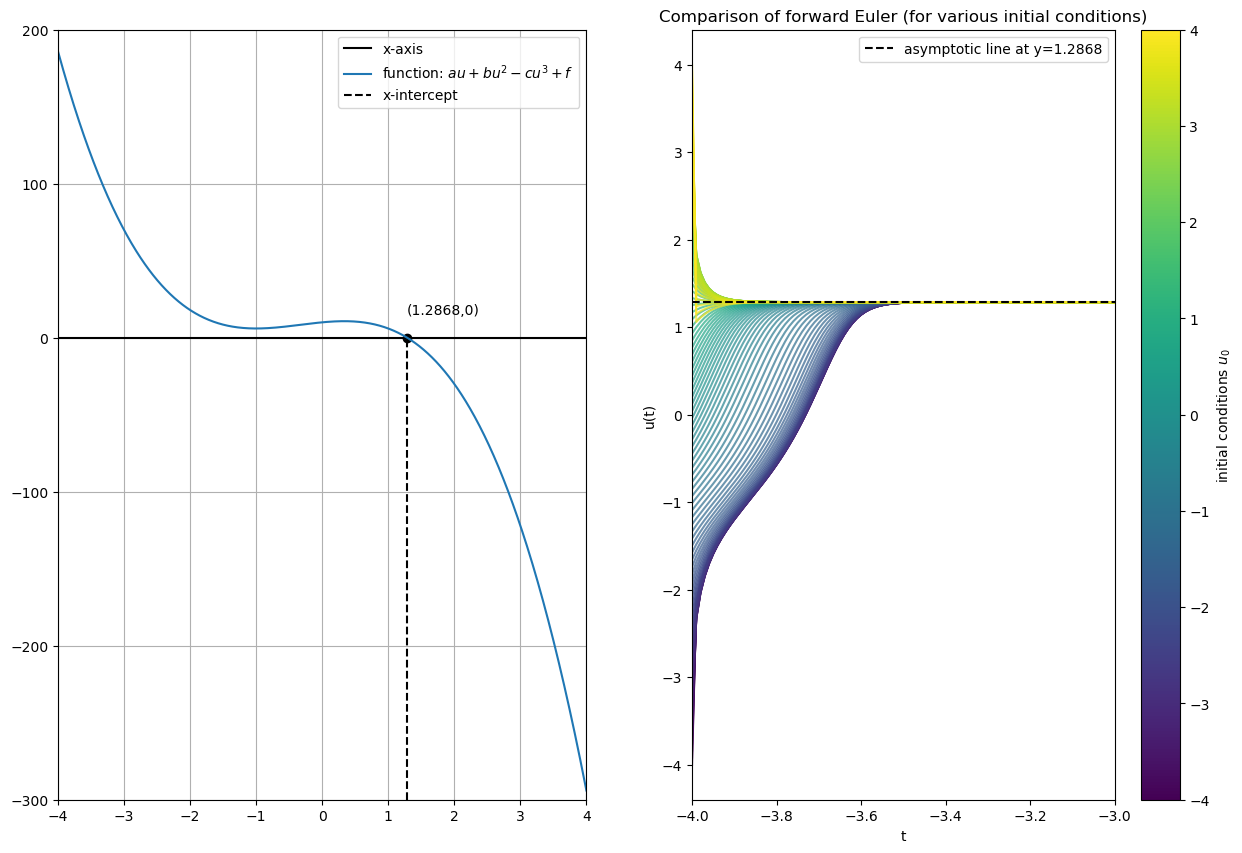

In [521]:
def du_dt(a, b, c, f, u):
   
    """
    ODE function u' = au + bu^2 - cu^3 + f.

    --- inputs ---
    - a: constant
    - f: constant
    - u: variable  
    """
    
    return (a*u + b*u**2 - c*u**3 + f)

def forward_euler(u0, t0, tend, h, a, b, c, f):
    
    """
    Implementing forward euler to estimate numerical solution of u'.

    --- inputs ---
    - u0: initial condition
    - t0: initial time
    - tend: final time
    - h: time-step
    - a: constant (for function du_dt)
    - f: constant (for function du_dt)
    """
    
    num_steps = int((tend-t0)/h)
    t = np.linspace(t0, tend, num_steps+1)
    y = np.zeros(num_steps+1)
    y[0] = u0
    
    for i in range(num_steps):
        y[i+1] = y[i] + h * du_dt(a=a, b=b, c=c, f=f, u=y[i])
    
    return t, y

xlim = [-4, 4]
ylim = [-300, 200]

u = np.linspace(xlim[0], xlim[1], 1000)
u_diff_output = []
for u_curr in u:
    u_diff_output.append(du_dt(a=a, b=b, c=c, f=f, u=u_curr))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 10))
ax0.plot([xlim[0], xlim[1]], [0,0], linestyle='-', color='black', label='x-axis')
ax0.plot(u, u_diff_output, label=f'function: $au + bu^2 - cu^3 + f$')

ax0.scatter(r[0].real, 0, color='black')
ax0.plot([r[0].real, r[0].real], 
         [ylim[0], 0], 
         linestyle='dashed', 
         color='black', 
         label=f'x-intercept')
ax0.annotate(text=f"({r[0].real},0)", xy=[r[0].real, 15])

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])
ax0.legend()
ax0.grid(True)

# Plotting forward Euler approximation (for various step-sizes)
num_points = 100
start = -4
end = 4
u0_values = np.linspace(start, end, num_points)
t_list = []
y_list = []

# Defining color schema
cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, num_points)]

# Calculate and plot for each initial condition with respective color
for i, u0 in enumerate(u0_values):
    t, y = forward_euler(u0=u0, t0=xlim[0], tend=xlim[1], h=0.01, a=a, b=b, c=c, f=f)
    t_list.append(t)
    y_list.append(y)
    ax1.plot(t, y, 
             alpha=0.7, 
             color=colors[i], 
             #label=f'Forward Euler Approximation ($u_0$={round(u0, 2)})'
             )

ax1.plot([xlim[0], xlim[1]], 
         [r[0].real, r[0].real],
         linestyle='--', 
         color='black', 
         label=f'asymptotic line at y={r[0].real}')

ax1.set_xlabel('t')
ax1.set_ylabel('u(t)')
ax1.set_title('Comparison of forward Euler (for various initial conditions)')
ax1.set_xlim(-4,-3)
ax1.grid(False)
ax1.legend()

# Add a colorbar to show the mapping from step size to color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=start, vmax=end))
sm.set_array([])

# Add the colorbar explicitly associated with the current axes
cbar = fig.colorbar(sm, ax=ax1)
cbar.set_label('initial conditions $u_0$')

plt.show()

## Question 2 (b.)

**When $a=4$ and $f=2$, the three roots of $au+bu^2-cu^3+f=0$ are
$r_1 = -1.4516$, $r_2 = 0.8546$ and $r_3 = -0.4030$.**

In [522]:
a=4
f=2

r = np.array([ -1.4516, 0.8546, -0.4030 ])

### Question 2b (i.) 

**Plot $au+bu^2-cu^3+f$ as a function of $u$ for the given values of parameters $a,b,c,f$.**

### Question 2b (ii.)

**Select different values of the initial condition $u_0$, and plot the numerical solutions in order to illustrate different solution behavior for different $u_0$.**

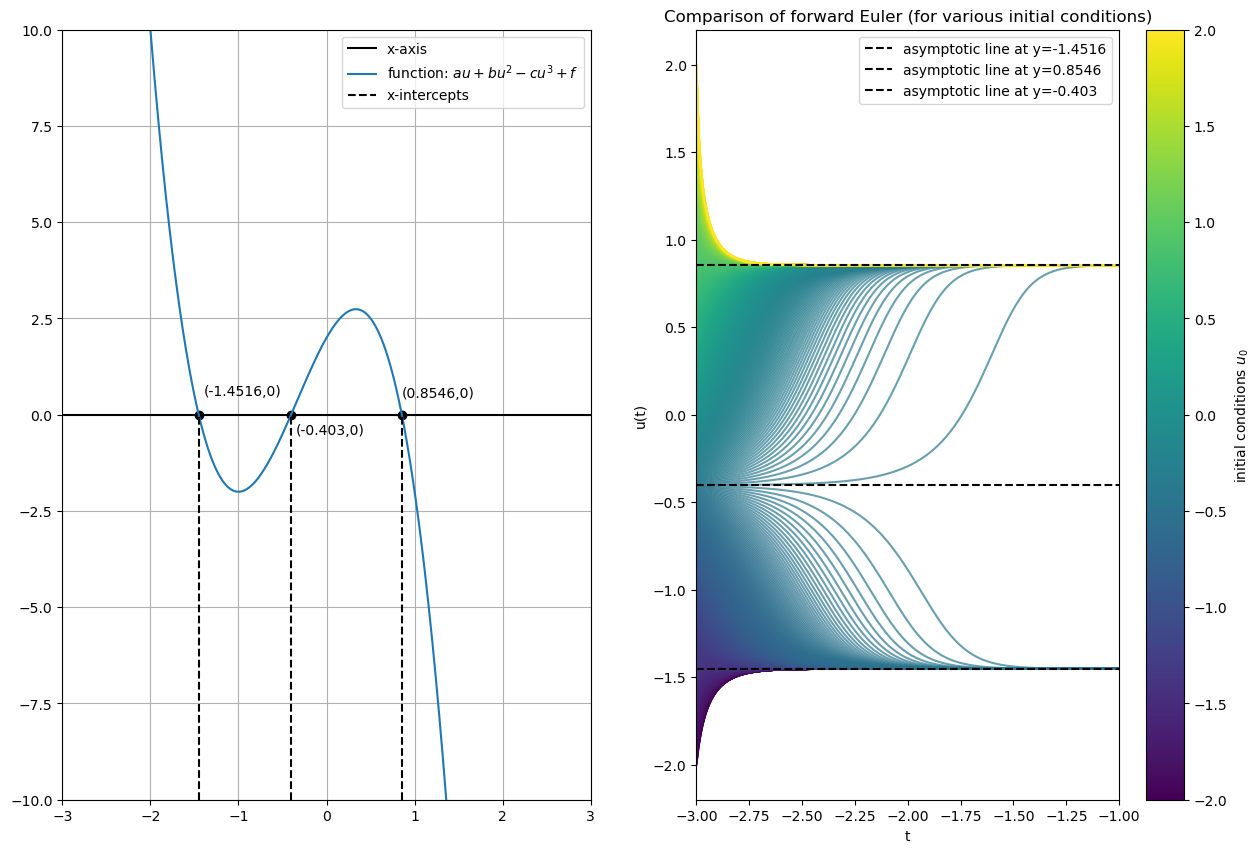

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [523]:
xlim = [-3, 3]
ylim = [-10, 10]

u = np.linspace(xlim[0], xlim[1], 1000)
u_diff_output = []
for u_curr in u:
    u_diff_output.append(du_dt(a=a, b=b, c=c, f=f, u=u_curr))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 10))
ax0.plot([xlim[0], xlim[1]], [0,0], linestyle='-', color='black', label='x-axis')
ax0.plot(u, u_diff_output, label=f'function: $au + bu^2 - cu^3 + f$')

ax0.scatter(r[0].real, 0, color='black')
ax0.plot([r[0].real, r[0].real], 
         [ylim[0], 0], 
         linestyle='dashed', 
         color='black', 
         label=f'x-intercepts')
ax0.annotate(text=f"({r[0].real},0)", xy=[-1.4,0.5])

ax0.scatter(r[1].real, 0, color='black')
ax0.plot([r[1].real, r[1].real], 
         [ylim[0], 0], 
         linestyle='dashed', 
         color='black')
ax0.annotate(text=f"({r[1].real},0)", xy=[0.85, 0.45])

ax0.scatter(r[2].real, 0, color='black')
ax0.plot([r[2].real, r[2].real], 
         [ylim[0], 0], 
         linestyle='dashed', 
         color='black')
ax0.annotate(text=f"({r[2].real},0)", xy=[-0.35,-0.5])

ax0.set_xlim(xlim[0], xlim[1])
ax0.set_ylim(ylim[0], ylim[1])
ax0.legend()
ax0.grid(True)

# Plotting forward Euler approximation (for various step-sizes)
num_points = 1000
start = -2
end = 2
u0_values = np.linspace(start, end, num_points)
t_list = []
y_list = []

# Defining color schema
cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, num_points)]

# Calculate and plot for each initial condition with respective color
for i, u0 in enumerate(u0_values):
    t, y = forward_euler(u0=u0, t0=xlim[0], tend=xlim[1], h=0.01, a=a, b=b, c=c, f=f)
    t_list.append(t)
    y_list.append(y)
    ax1.plot(t, y, 
             alpha=0.7, 
             color=colors[i], 
             #label=f'Forward Euler Approximation ($u_0$={round(u0, 2)})'
             )

ax1.plot([xlim[0], xlim[1]], 
         [r[0].real, r[0].real],
         linestyle='--', 
         color='black', 
         label=f'asymptotic line at y={r[0].real}')

ax1.plot([xlim[0], xlim[1]], 
         [r[1].real, r[1].real],
         linestyle='--', 
         color='black', 
         label=f'asymptotic line at y={r[1].real}')

ax1.plot([xlim[0], xlim[1]], 
         [r[2].real, r[2].real],
         linestyle='--', 
         color='black', 
         label=f'asymptotic line at y={r[2].real}')

ax1.set_xlabel('t')
ax1.set_ylabel('u(t)')
ax1.set_title('Comparison of forward Euler (for various initial conditions)')
ax1.set_xlim(-3,-1)
ax1.grid(False)
ax1.legend()

# Add a colorbar to show the mapping from step size to color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=start, vmax=end))
sm.set_array([])

# Add the colorbar explicitly associated with the current axes
cbar = fig.colorbar(sm, ax=ax1)
cbar.set_label('initial conditions $u_0$')

plt.show()
plt.figure(figsize=(15, 10))

**What did we learn here? Nonlinear ODEs can potentially have multiple equilibria, or only one or zero equilibria, depending on the nonlinearity and the parameter values. Furthermore, the equilibrium points can be either stable or unstable.**

# Question 3.

**Consider the 2-dimensional linear model:**

$$ \frac{du_1}{dt} = -au_1 + \omega u_2 + f_1$$
$$ \frac{du_2}{dt} = -\omega u_1 - a u_2 + f_2$$

**Use the forward Euler method to numerically solve the equation and plot the trajectories of $(u_1, u_2)$ in the two-dimensional space. Discuss the difference in the following three situations: (a) $a = 0$, (b) $a = 1$, and (c) $a = −1$. You may fix other parameters $\omega = 1$ and $f_1 = f_2 = 0$.**

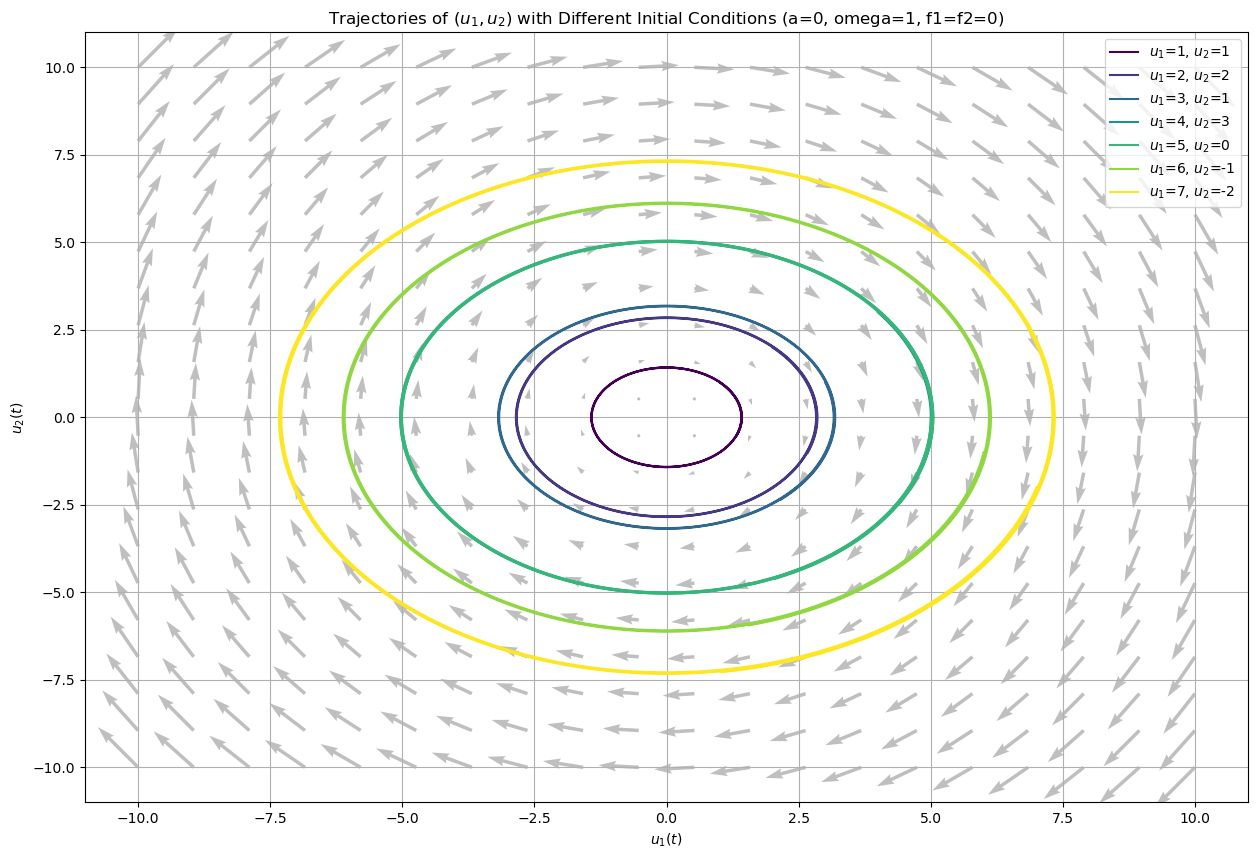

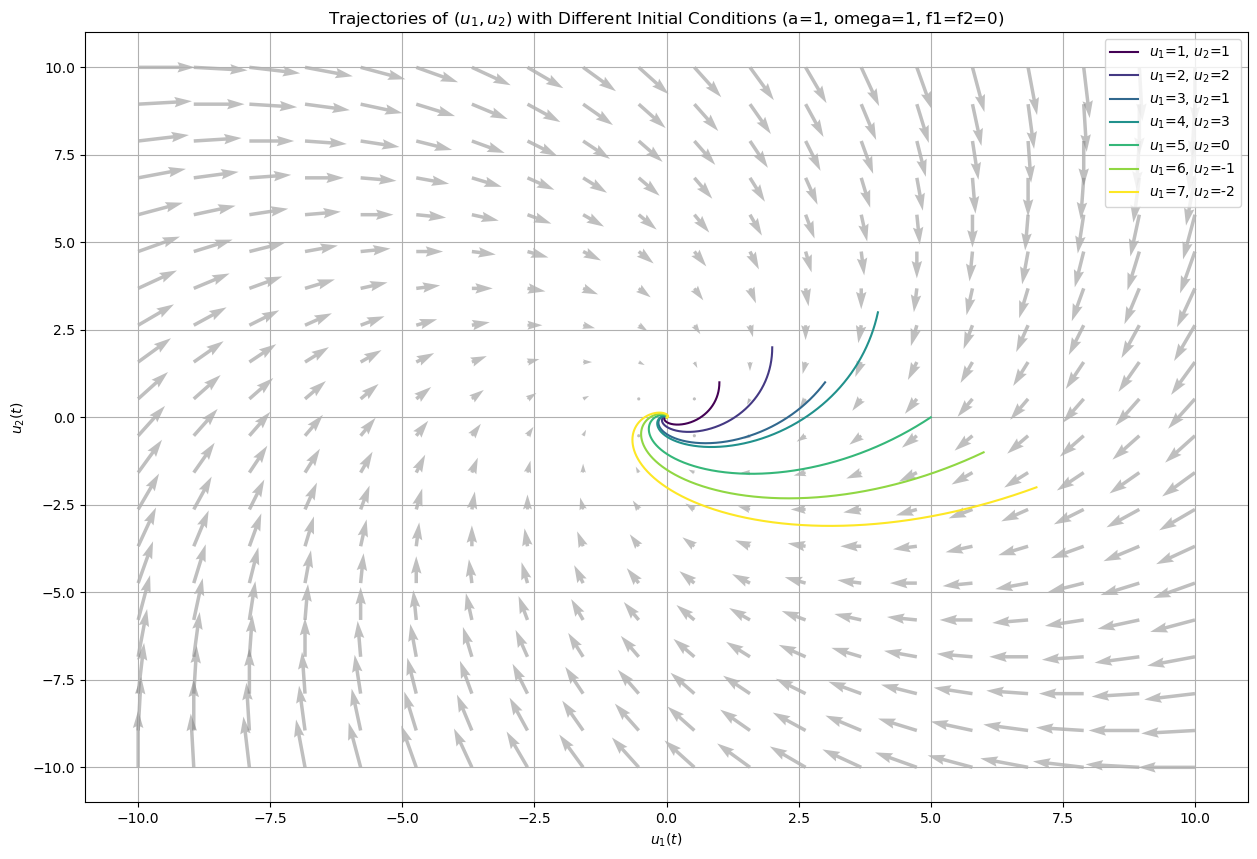

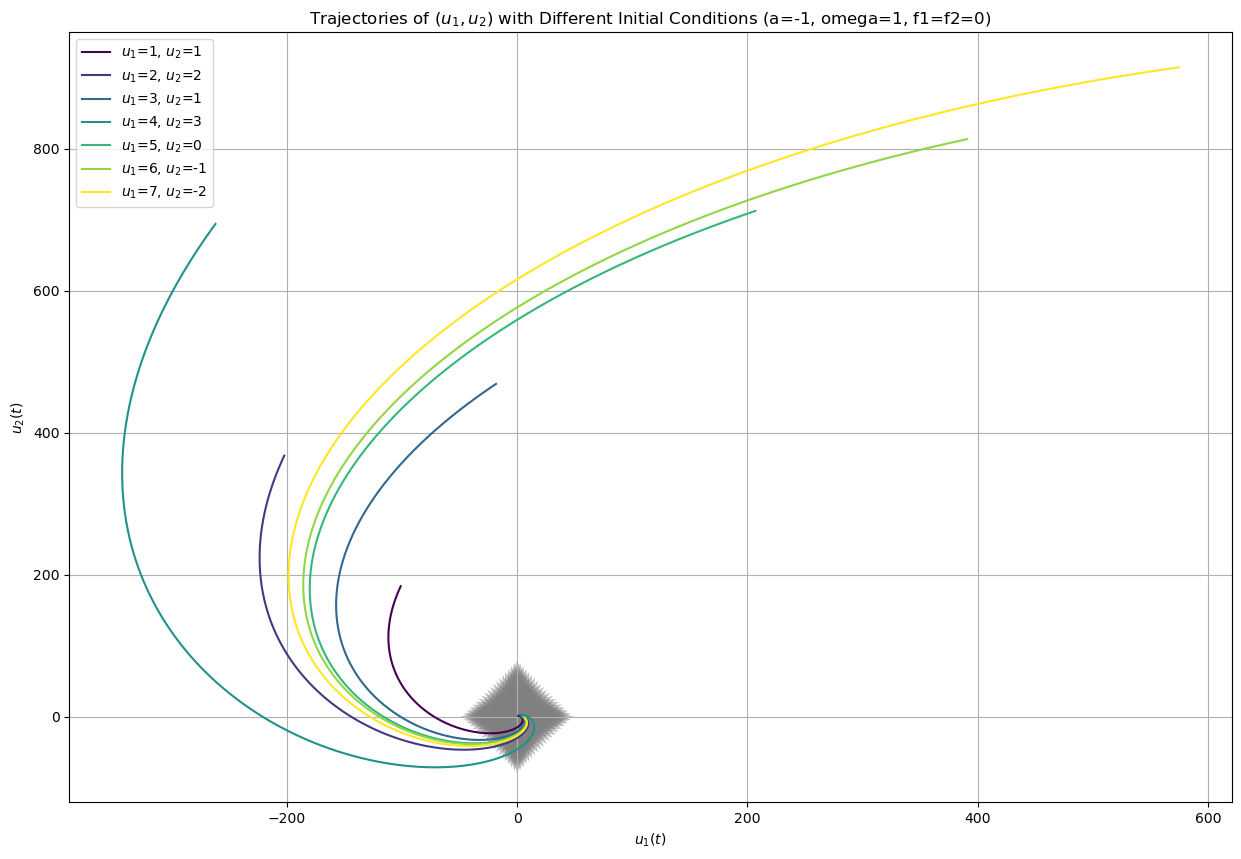

In [524]:
def du1_dt(a, omega, f1, u1, u2):
    return (-a*u1 + omega*u2 + f1)

def du2_dt(a, omega, f2, u1, u2):
    return (-omega*u1 - a*u2 + f2)

def forward_euler(u10, u20, t0, tend, h, a, omega, f1, f2):
    
    """
    Implementing forward Euler to estimate numerical solution of the system:
    du1/dt = -a * u1 + omega * u2 + f1
    du2/dt = -omega * u1 - a * u2 + f2

    --- inputs ---
    - u1_0, u2_0: initial conditions for u1 and u2
    - t0: initial time
    - tend: final time
    - h: time-step
    - a: constant (system parameter)
    - omega: constant (system parameter)
    - f1, f2: external forcing terms
    """
    
    num_steps = int((tend-t0)/h)
    t = np.linspace(t0, tend, num_steps+1)
    y = np.zeros(shape=(num_steps+1, 2))
    y[0] = np.array([u10, u20])
    
    for i in range(num_steps):
        u1 = y[i][0]
        u2 = y[i][1]
        y[i+1] = np.array([
            u1 + h * du1_dt(a=a, omega=omega, f1=f1, u1=u1, u2=u2),
            u2 + h * du2_dt(a=a, omega=omega, f2=f2, u1=u1, u2=u2)
        ])
    
    return (t, y)

a=[0,1,-1]
omega=1
f1, f2 = 0, 0

initial_conditions = [(1, 1), (2, 2), (3, 1), (4, 3), (5, 0), (6, -1), (7, -2)]

cmap = cm.get_cmap('viridis')
colors = [cmap(i) for i in np.linspace(0, 1, len(initial_conditions))]

for a_curr in a:
    plt.figure(figsize=(15, 10))
    if a_curr != -1:
        for idx, (u10, u20) in enumerate(initial_conditions):
            t, y = forward_euler(u10=u10, u20=u20, t0=0, tend=20, h=0.001, a=a_curr, omega=omega, f1=f1, f2=f2)
            plt.plot(y[:, 0], y[:, 1], label=f'$u_{1}$={u10}, $u_{2}$={u20}', color=colors[idx])

        u1_vals = np.linspace(-10, 10, 20)
        u2_vals = np.linspace(-10, 10, 20)
        U1, U2 = np.meshgrid(u1_vals, u2_vals)

        dU1_dt = du1_dt(a=a_curr, omega=1, u1=U1, u2=U2, f1=f1)
        dU2_dt = du2_dt(a=a_curr, omega=1, u1=U1, u2=U2, f2=f2)
        plt.quiver(U1, U2, dU1_dt, dU2_dt, color='gray', alpha=0.5)

    else:
        for idx, (u10, u20) in enumerate(initial_conditions):
            t, y = forward_euler(u10=u10, u20=u20, t0=0, tend=5, h=0.001, a=a_curr, omega=omega, f1=f1, f2=f2)
            plt.plot(y[:, 0], y[:, 1], label=f'$u_{1}$={u10}, $u_{2}$={u20}', color=colors[idx])

        u1_vals = np.linspace(-1e-10, 1e-10, 20)
        u2_vals = np.linspace(-1e-10, 1e-10, 20)
        U1, U2 = np.meshgrid(u1_vals, u2_vals)

        dU1_dt = du1_dt(a=a_curr, omega=1, u1=U1, u2=U2, f1=f1)
        dU2_dt = du2_dt(a=a_curr, omega=1, u1=U1, u2=U2, f2=f2)
        plt.quiver(U1, U2, dU1_dt, dU2_dt, color='gray', alpha=0.5)
    

    plt.xlabel('$u_1(t)$')
    plt.ylabel('$u_2(t)$')
    plt.title(f'Trajectories of $(u_1, u_2)$ with Different Initial Conditions (a={a_curr}, omega=1, f1=f2=0)')
    plt.grid(True)
    plt.legend()
    plt.show()

**What did we learn here? Phase portraits can be helpful for characterizing the different behaviors of dynamical systems.**

# Question 4.

**Consider a Gaussian random variable $\mathbf{x} = (\mathbf{x_1}, \mathbf{x_2})^T$ with the mean $\mathbf{\mu}$ and the covariance matrix $\mathbf{\Sigma}$ being in the following form,**
$$ \mathbf{\mu} = \begin{bmatrix} \mathbf{\mu_1}\\ \mathbf{\mu_2} \end{bmatrix}, \quad \mathbf{\Sigma} = \begin{bmatrix} \mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\ \mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}} \end{bmatrix} $$
**where $\mathbf{x_1}$ and $\mathbf{x_2}$ are multi-dimensional.** 

**Show that the conditional density is then given by:**
$$ p(\mathbf{x_1} | \mathbf{x_2}) \sim \mathcal{N}(\bar{\mathbf{\mu}}, \bar{\mathbf{\Sigma}}) $$
**where**
$$ \bar{\mathbf{\mu}} = \mathbf{\mu_1} + \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}^{-1}}(\mathbf{x_2} - \mathbf{\mu_2}) \quad \text{and} \quad \bar{\mathbf{\Sigma}} = \mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}^{-1}}\mathbf{\Sigma_{21}} $$

Let $\mathbf{x_1} \sim \mathcal{N}(\mu_1, \mathbf{\Sigma}_{11}) \in \mathbb{R}^n$ and $\mathbf{x_2} \sim \mathcal{N}(\mu_2, \mathbf{\Sigma}_{22}) \in \mathbb{R}^m$, then we have that:
$$ \mathbf{x} \sim \mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma}) = (\mathbf{x_1}, \mathbf{x_2})^T \in \mathbb{R}^{n+m} $$

The conditional probability distrbution can be written as:
$$ p(\mathbf{x_1} | \mathbf{x_2}) = \frac{p(\mathbf{x_1}, \mathbf{x_2})}{p(\mathbf{x_2})} = \frac{\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})}{\mathcal{N}(\mathbf{\mu_2}, \mathbf{\Sigma_{22}})} $$

Solving for the above, we have that:
\begin{equation*}
    \begin{split}
        p(\mathbf{x_1} | \mathbf{x_2}) &= \frac{\frac{1}{\sqrt{(2\pi)^{n+m}|\mathbf{\Sigma}|}} \cdot \text{exp}\big[-\frac{1}{2}(\mathbf{x}-\mu)^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mu)\big]}{\frac{1}{\sqrt{(2\pi)^{n}|\mathbf{\Sigma}|}} \cdot \text{exp}\big[-\frac{1}{2}(\mathbf{x_2}-\mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\big]}\\
        &= \sqrt{\frac{|\mathbf{\Sigma}_{22}|}{(2\pi)^{m} \cdot |\mathbf{\Sigma}|}} \cdot \text{exp}\big(-\frac{1}{2}(\mathbf{x}-\mu)^T \Sigma^{-1} (\mathbf{x} - \mu) + \frac{1}{2}(\mathbf{x_2}-\mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\big)\\
        &= \sqrt{\frac{|\mathbf{\Sigma}_{22}|}{(2\pi)^{m} \cdot |\mathbf{\Sigma}|}} \cdot \text{exp}\bigg(-\frac{1}{2}\bigg(\begin{bmatrix} \mathbf{x_1}\\ \mathbf{x_2} \end{bmatrix}- \begin{bmatrix} \mathbf{\mu_1}\\ \mathbf{\mu_2} \end{bmatrix}\bigg)^T \mathbf{\Sigma}^{-1} \bigg(\begin{bmatrix} \mathbf{x_1}\\ \mathbf{x_2} \end{bmatrix}- \begin{bmatrix} \mathbf{\mu_1}\\ \mathbf{\mu_2} \end{bmatrix}\bigg) + \frac{1}{2}(\mathbf{x_2}-\mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\bigg)\\
        &= \sqrt{\frac{|\mathbf{\Sigma}_{22}|}{(2\pi)^{m} \cdot |\mathbf{\Sigma}|}} \cdot \text{exp}\bigg(-\frac{1}{2}\bigg(\begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix}^T \mathbf{\Sigma}^{-1} \begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix} \bigg) + \frac{1}{2}(\mathbf{x_2}-\mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\bigg)\\
        &= \sqrt{\frac{|\mathbf{\Sigma}_{22}|}{(2\pi)^{m} \cdot |\mathbf{\Sigma}|}} \cdot \text{exp}\bigg(-\frac{1}{2}\bigg(\begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix}^T \begin{bmatrix} \mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\ \mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}} \end{bmatrix}^{-1} \begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix} \bigg) + \frac{1}{2}(\mathbf{x_2}-\mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\bigg)\\
    \end{split}
\end{equation*}

To compute $\mathbf{\Sigma}^{-1}$,  we apply theorem 2.1 of the following paper cited [here](http://msvlab.hre.ntou.edu.tw/grades/now/inte/Inverse%20%26%20Border/border-LuTT.pdf) which provide explicit formulae to compute inverses for $2 \times 2$ block matrices.

$$ \mathbf{\Sigma}^{-1} = 
\begin{bmatrix} 
    \mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\ \mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}} \end{bmatrix}^{-1} = \begin{bmatrix} (\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1} & -(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\\ -\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1} & \mathbf{\Sigma_{22}}^{-1} + \mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}
\end{bmatrix} $$

Now, we can see that, after substituting $\mathbf{\Sigma}^{-1}$ in $(\mathbf{x} - \mu)^T \mathbf{\Sigma}^{-1} (\mathbf{x} - \mu)$:
\begin{equation*}
    \begin{split}
        &= \begin{bmatrix} 
            \mathbf{x_1} - \mu_1\\ 
            \mathbf{x_2} - \mu_2 
            \end{bmatrix}^T 
            \begin{bmatrix} 
            (\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1} & -(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\\
            -\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1} & \mathbf{\Sigma_{22}}^{-1} + \mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1} \end{bmatrix} \begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix}
    \end{split}
\end{equation*}

Distributing the terms, we have:
\begin{equation*}
    \begin{split}
        &= \begin{bmatrix} 
            (\mathbf{x_1} - \mu_1)^T (\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1} + (\mathbf{x_2} - \mu_2)^T \big(-\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})\big)^{-1}\\
            (\mathbf{x_1} - \mu_1)^T\big(-(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big) + (\mathbf{x_2} - \mu_2)^T \big(\mathbf{\Sigma_{22}}^{-1} + \mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)
            \end{bmatrix}^T \begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix}\\
    \end{split}
\end{equation*}

From above, we have that:
\begin{equation*}
    \begin{split}
            \begin{bmatrix} 
                \mathbf{x_1} - \mu_1\\ 
                \mathbf{x_2} - \mu_2 
            \end{bmatrix}^T 
            \begin{bmatrix} 
                \mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\ 
                \mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}}
            \end{bmatrix}^{-1}
            \begin{bmatrix} 
                \mathbf{x_1} - \mu_1\\ 
                \mathbf{x_2} - \mu_2 
            \end{bmatrix} &= \quad (\mathbf{x_1} - \mu_1)^T(\mathbf{\Sigma_{11}} - \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}\mathbf{\Sigma}_{21})^{-1} (\mathbf{x_1} - \mu_1)\\
            & \quad + (\mathbf{x_2} - \mu_2)^T \big(-\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})\big)^{-1}(\mathbf{x_1} - \mu_1)\\
            & \quad + (\mathbf{x_1} - \mu_1)^T\big(-(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)(\mathbf{x_2} - \mu_2)\\
            & \quad + (\mathbf{x_2} - \mu_2)^T\big(\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)(\mathbf{x_2} - \mu_2)\\
            & \quad + (\mathbf{x_2} - \mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\\
            \\
            &= \quad (\mathbf{x_1} - \mu_1)^T(\mathbf{\Sigma_{11}} - \mathbf{\Sigma}_{12}\mathbf{\Sigma}_{22}^{-1}\mathbf{\Sigma}_{21})^{-1} (\mathbf{x_1} - \mu_1)\\
            & \quad - 2(\mathbf{x_1} - \mu_1)^T\big(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\big(\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)(\mathbf{x_2} - \mu_2)\\
            & \quad + (\mathbf{x_2} - \mu_2)^T\big(\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}(\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}})^{-1}\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)(\mathbf{x_2} - \mu_2)\\
            & \quad + (\mathbf{x_2} - \mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2)\\
    \end{split}
\end{equation*}

We can substitute the above and substitute $\mathbf{\Sigma}$ and simplify as follows:
\begin{equation*}
    \begin{split}
        -\frac{1}{2}\bigg(\begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix}^T \begin{bmatrix} \mathbf{\Sigma_{11}} & \mathbf{\Sigma_{12}}\\ \mathbf{\Sigma_{21}} & \mathbf{\Sigma_{22}} \end{bmatrix}^{-1} \begin{bmatrix} \mathbf{x_1} - \mu_1\\ \mathbf{x_2} - \mu_2 \end{bmatrix} \bigg) + \frac{1}{2}(\mathbf{x_2}-\mu_2)^T \mathbf{\Sigma_{22}}^{-1} (\mathbf{x_2} - \mu_2) 
        &= -\frac{1}{2} (\mathbf{x_1} - \mu_1)^T \bar{\mathbf{\Sigma}}^{-1} (\mathbf{x_1} - \mu_1)\\
        & \quad + (\mathbf{x_1} - \mu_1)^T\bar{\mathbf{\Sigma}}^{-1}\big(\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)(\mathbf{x_2} - \mu_2)\\
        & \quad - \frac{1}{2}(\mathbf{x_2} - \mu_2)^T\big(\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}\bar{\mathbf{\Sigma}}^{-1}\big)\big(\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\big)(\mathbf{x_2} - \mu_2)\\
        \\
        &= -\frac{1}{2} \begin{pmatrix} (\mathbf{x_1} - \mu_1) - (\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1})(\mathbf{x_2} - \mu_2) \end{pmatrix}^T \bar{\mathbf{\Sigma}}^{-1} \begin{pmatrix} (\mathbf{x_1} - \mu_1) - (\mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1})(\mathbf{x_2} - \mu_2) \end{pmatrix}\\
        \\
        &= -\frac{1}{2} (\mathbf{x_1} - \bar{\mu})^T \bar{\mathbf{\Sigma}}^{-1} (\mathbf{x_1} - \bar{\mu})\\
    \end{split}
\end{equation*}

We use the result from theorem 2.1 (Determinant Formulas) which can be found [here](https://gubner.ece.wisc.edu/notes/BlockMatrixFormulas.pdf), which tells us that:

\begin{equation*}
    \begin{split}
        \sqrt{\frac{|\mathbf{\Sigma}_{22}|}{(2\pi)^{m} \cdot |\mathbf{\Sigma}|}} &= \sqrt{\frac{|\mathbf{\Sigma}_{22}|}{(2\pi)^{m} \cdot |\mathbf{\Sigma_{22}}| \cdot |\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}|}}\\
        &= \sqrt{\frac{1}{(2\pi)^{m} \cdot |\mathbf{\Sigma_{11}} - \mathbf{\Sigma_{12}}\mathbf{\Sigma_{22}}^{-1}\mathbf{\Sigma_{21}}|}}\\
        &= \sqrt{\frac{1}{(2\pi)^{m} \cdot |\bar{\mathbf{\Sigma}}|}}
    \end{split}
\end{equation*}

Therefore, we now have the conditional probability distribution as follows:
$$ p(\mathbf{x_1} | \mathbf{x_2}) = \sqrt{\frac{1}{(2\pi)^{m} \cdot |\bar{\mathbf{\Sigma}}|}} \cdot \text{exp}\bigg(-\frac{1}{2} (\mathbf{x_1} - \bar{\mu})^T \bar{\mathbf{\Sigma}}^{-1} (\mathbf{x_1} - \bar{\mu})\bigg) $$

Which proves that:
$$ \mathbf{x_1} | \mathbf{x_2} \sim N(\bar{\mu}, \bar{\mathbf{\Sigma}})$$

as required.

**What did we learn here? For a multivariate Gaussian random variable, the conditional distribution is also Gaussian. Moreover, an analytical formula can be derived for the conditional mean and conditional covariance.**